# Stock Market Prediction using ML

In [2]:
!pip install yfinance

     -------------------------------------- 948.2/948.2 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies: started

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 101.1/101.1 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 147.9/147.9 kB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 10.8/10.8 MB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 508.0/508.0 kB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 64.9/64.9 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 101.5/101.5 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 229.9/229.9 kB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 346.6/346.6 kB 7.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=

In [3]:
import yfinance as yf

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sp500 = yf.Ticker("^GSPC") # GSPC is SP500 index

In [5]:
sp500 = sp500.history(period='max') # Historical prices

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-11 00:00:00-05:00,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,0.0,0.0
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,0.0,0.0
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,0.0,0.0


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-11-04 00:00:00-05:00', '2024-11-05 00:00:00-05:00',
               '2024-11-06 00:00:00-05:00', '2024-11-07 00:00:00-05:00',
               '2024-11-08 00:00:00-05:00', '2024-11-11 00:00:00-05:00',
               '2024-11-12 00:00:00-05:00', '2024-11-13 00:00:00-05:00',
               '2024-11-14 00:00:00-05:00', '2024-11-15 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24337, freq=None)

# Cleaning and Visualizing our Stock Market Data

<AxesSubplot:xlabel='Date'>

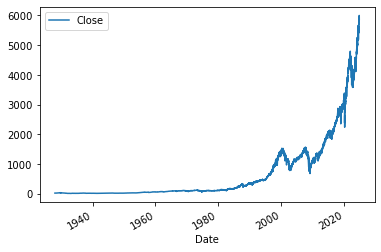

In [15]:
sp500.plot.line(y="Close", use_index=True)

In [16]:
# Deleting the extra columns, which we do not need
del sp500["Dividends"]
del sp500["Stock Splits"]

# Setting up for target Machine Learning

In [17]:
# Whether the price will go up or down
# On particular day, whether the stock will go up
sp500["Tomorrow"] = sp500["Close"].shift(-1)
# Tomorrow's price is the closing price of previous day's price.

In [18]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-11-11 00:00:00-05:00,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,5983.990234
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922


In [19]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [20]:
sp500
# 0 price went down, and 1 price went up

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-11-11 00:00:00-05:00,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,5983.990234,0
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0


In [21]:
sp500 = sp500.loc["1990-01-01":].copy()
# sometimes pandas get copy warning, when subsetting the dataframe and getting back

# Training an Initial ML model

In [23]:
# Training the bunch of individual trees with randomised parameters and then 
# averaging those results based on these randomised parameteres.
# Thus, random forests are resistant to overfitting. They run relatively quickly.
# Pick up non-linear relationships from the data
from sklearn.ensemble import RandomForestClassifier
# min_samples_split - higher the value, less accuracy but will not overfit. We need to keep adjusting based on the scenarios.
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
# We can't do the cross-validation in time series data, results will be better but horrible in real-life examples.
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [24]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [26]:
preds = pd.Series(preds, index=test.index)

In [27]:
precision_score(test["Target"], preds)

0.6590909090909091

In [28]:
combines = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

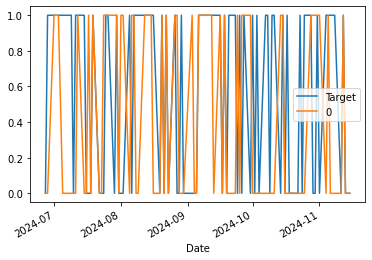

In [29]:
combines.plot()

# Building a Backtesting System

In [45]:
# Build a more robust way to test our algorithm
# To workin the future
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    # Combining the model into series
    preds = pd.Series(preds, index=test.index, name="Predictions")
    # Combining everything together
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [50]:
def backtest(data, model, predictors, start=2500, step=250):
    # Every trading year has 250 days, 2500 means, train your model on 10 years of data.
    # 250 training the model for one year and going onto next year and then next year.
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [51]:
predictions = backtest(sp500, model, predictors)

In [52]:
predictions["Predictions"].value_counts()
# 0 we predicted when market was going down
# 1 we predicted when the market was going up.

Predictions
0    3666
1    2621
Name: count, dtype: int64

In [54]:
precision_score(predictions["Target"], predictions["Predictions"])
# It's like 52% we predicted the market was going up or down

0.5288057993132392

In [56]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535709
0    0.464291
Name: count, dtype: float64

# Adding Additional Predictors to our Model

In [58]:
# Calculating the mean price of closing week, last week, last 3 months, last 4 years
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [59]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11 00:00:00-05:00,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,5983.990234,0,1.000484,2.0,1.010948,5.0,1.050171,34.0,1.143238,148.0,1.349436,529.0
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1,0.998552,1.0,1.001236,4.0,1.045987,33.0,1.138640,147.0,1.344806,528.0
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0,1.000116,1.0,0.999584,4.0,1.045048,34.0,1.137620,147.0,1.344385,529.0


In [60]:
sp500 = sp500.dropna()

In [61]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08 00:00:00-05:00,5976.759766,6012.450195,5976.759766,5995.540039,4666740000,6001.350098,1,1.001875,2.0,1.019888,4.0,1.050524,34.0,1.143516,147.0,1.348868,528.0
2024-11-11 00:00:00-05:00,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,5983.990234,0,1.000484,2.0,1.010948,5.0,1.050171,34.0,1.143238,148.0,1.349436,529.0
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1,0.998552,1.0,1.001236,4.0,1.045987,33.0,1.138640,147.0,1.344806,528.0


# Improving our Model

In [62]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [63]:
# Build a more robust way to test our algorithm
# To workin the future
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] # Probability it will go up or down tomorrow
    preds[preds >= 0.6] = 1 # more than 60 %  chances if the price will go up
    preds[preds < 0.6] = 0 # 
    # Combining the model into series
    preds = pd.Series(preds, index=test.index, name="Predictions")
    # Combining everything together
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [65]:
predictions = backtest(sp500, model, new_predictors)

In [66]:
predictions["Predictions"].value_counts()

Predictions
0.0    4437
1.0     849
Name: count, dtype: int64

In [67]:
precision_score(predictions["Target"], predictions["Predictions"])

0.574793875147232

# Summary and Next Steps with Model

In [ ]:
# Exchanges that are open over night, indices open before US market
# Adding news, articles, macro economic conditions, inflation
# Key stocks, tech stocks influence
# Increase the resolution such as hourly data, minute data - make more accurate predictions
